In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_5_MLR

02-07-2022  10:31    <DIR>          .
02-07-2022  10:31    <DIR>          ..
02-07-2022  09:27    <DIR>          .ipynb_checkpoints
02-07-2022  09:13             2,436 50_Startups.csv
02-07-2022  10:31               719 assignment5_multi_linear_regression.ipynb
02-07-2022  09:12               468 proble_statement(50_startups).txt
02-07-2022  09:13             1,752 Toyota Corolla.txt
02-07-2022  09:13           224,041 ToyotaCorolla.csv
               5 File(s)        229,416 bytes
               3 Dir(s)  91,107,241,984 bytes free


# Q1--> TOYOTA COROLLA

Consider only the below columns and prepare a prediction model for predicting Price.

("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")

In [6]:
# Reading the data
data_1=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
data_1.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [12]:
df1=data_1[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [13]:
# Independent variable--> Features--> Age_08_04, KM	HP, cc, Doors, Gears, Quarterly_Tax, Weigh
# Dependent variable--> Target--> Price

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [15]:
df1.isna().sum()    # There are no null values

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [16]:
# Correlation Matrix to check the correlation between the features
df1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

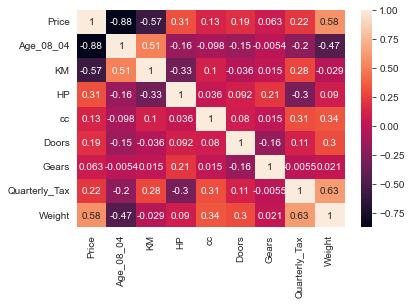

In [23]:
# Heatmaps for clear idea of the correlation matrix
sn.heatmap(df1.corr(),annot=True)

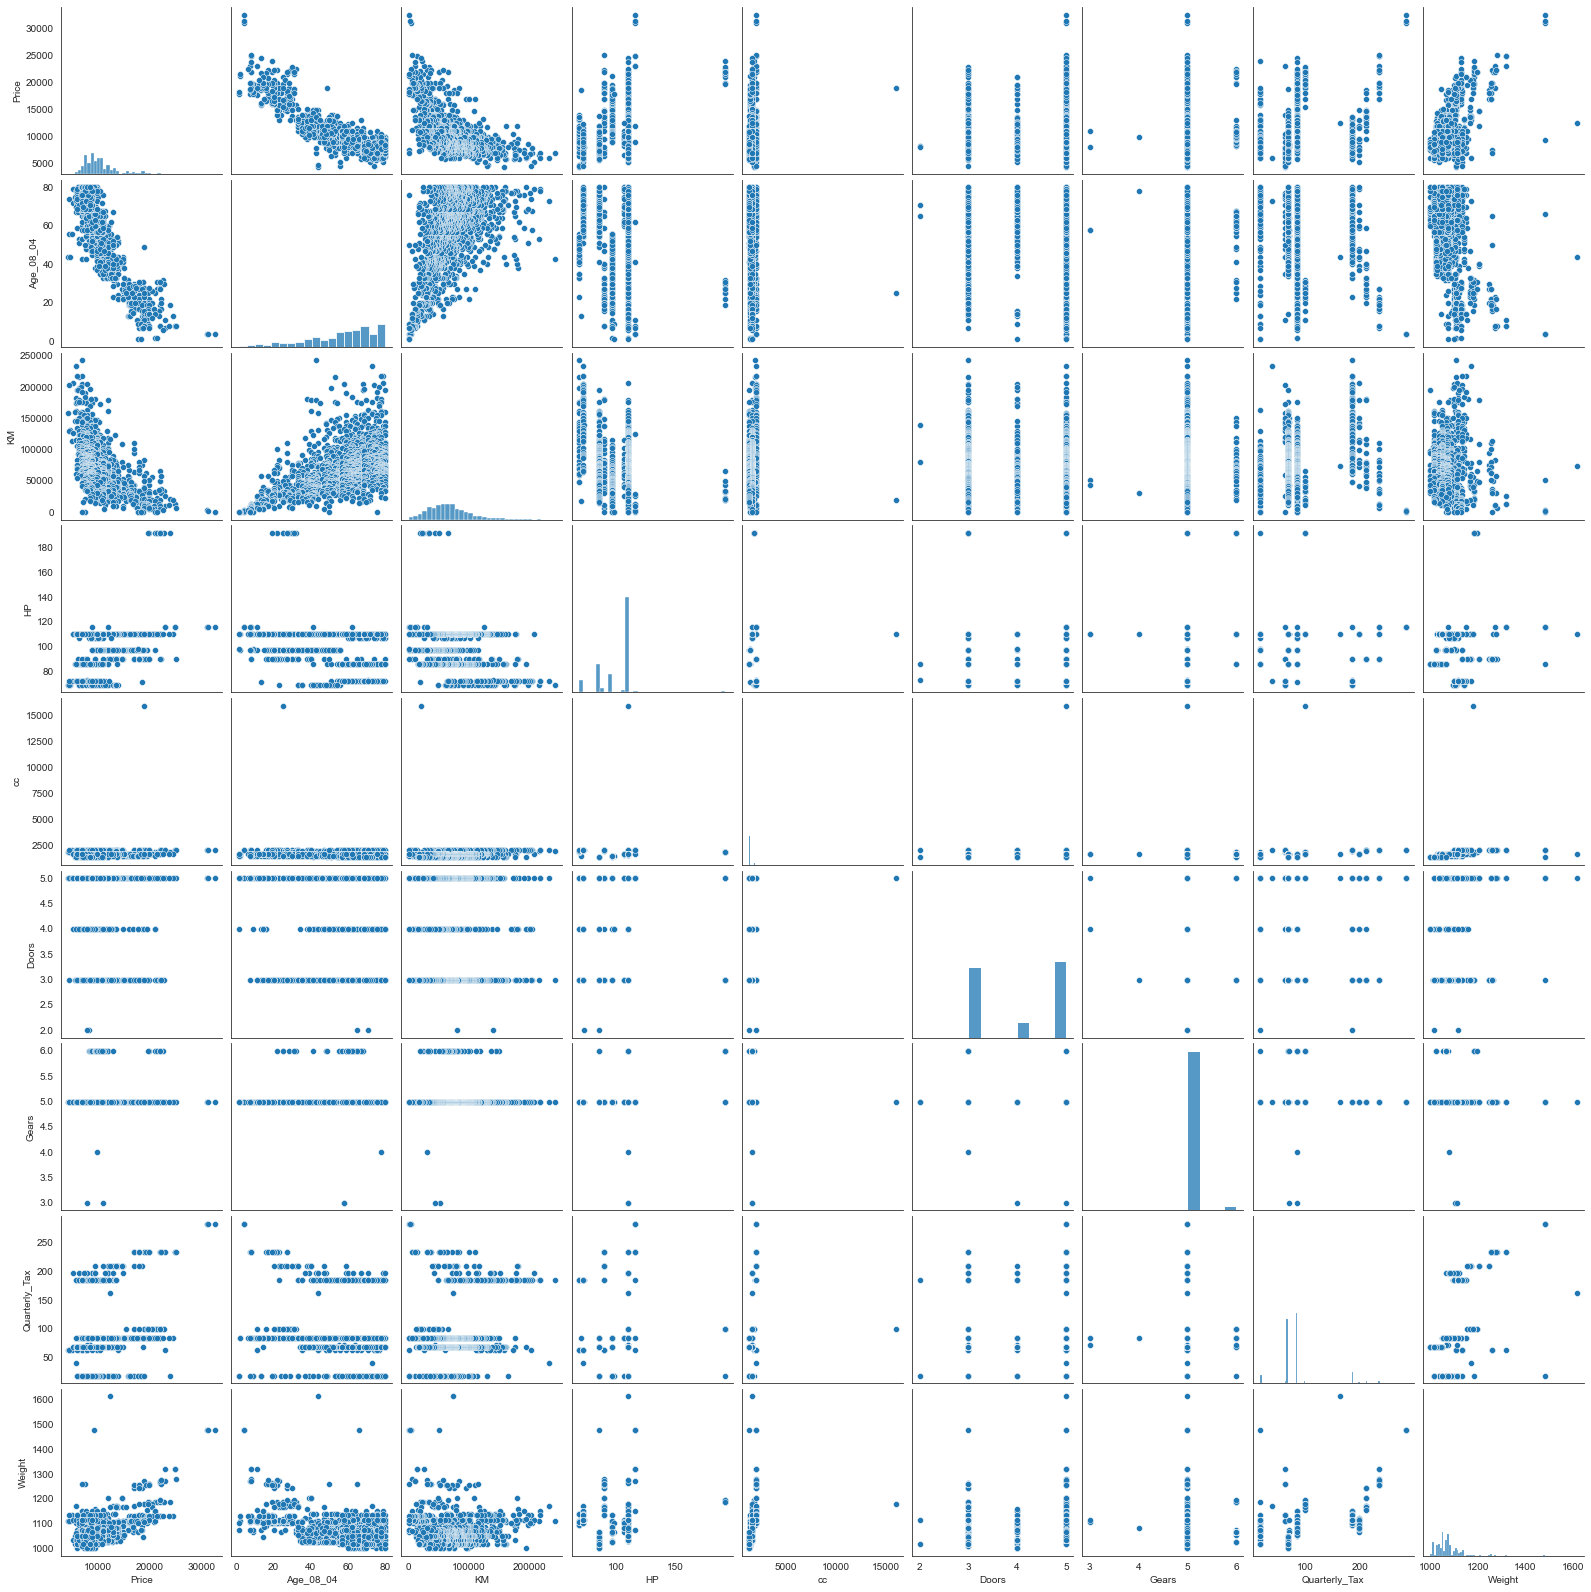

In [25]:
# Pairplots to check whether the features are related or not

sn.pairplot(df1)

In [42]:
# Preparing a model
m_1=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df1).fit()
m_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:24:10   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
m_1.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [44]:
(m_1.rsquared,m_1.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [46]:
m_1.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

The r_squared value and the p_values of the model is good so the model can be accepted. But there are two features (cc and doors) for which the p_value is not good which means that those 2 features are dependent on each other.

In [47]:
# Simple Regression Model
# Model of Price vs cc
m_cc=smf.ols("Price~cc",data=df1).fit()
m_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           1.55e-06
Time:                        11:30:45   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Model of Price vs Doors
m_doors=smf.ols("Price~Doors",data=df1).fit()
m_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           1.46e-12
Time:                        11:32:26   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
'''The p values for both models is nearly zero which means that the parameters are not affecting the model when 
taken individually in to consideration'''

In [51]:
# Model of price vs Doors and cc combined
m_cc_doors=smf.ols("Price~Doors+cc",data=df1).fit()
m_cc_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           1.15e-15
Time:                        11:38:15   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
cc             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From this we cannot say clearly that whether the features are affecting the model or not, so let us test with the VIF method.

In [56]:
# Checking by VIF Scores

rsq_age=smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df1).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=df1).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols("cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=df1).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols("Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=df1).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gear=smf.ols("Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=df1).fit().rsquared
vif_gear=1/(1-rsq_gear)

rsq_tax=smf.ols("Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight",data=df1).fit().rsquared
vif_tax=1/(1-rsq_tax)

rsq_wt=smf.ols("Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax",data=df1).fit().rsquared
vif_wt=1/(1-rsq_wt)

VIF=pd.DataFrame({'Variables':["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gear,vif_tax,vif_wt]})
VIF

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [65]:
# All the VIF values are less than 20 hence we can say that all features are independent
# There is no need to remove any feature from the model

Text(0.5, 1.0, 'Normal QQ plot for residuals')

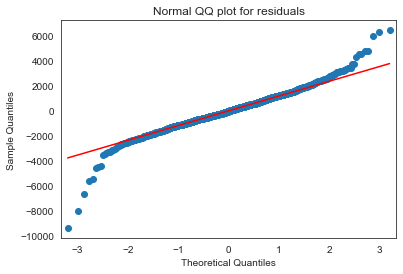

In [67]:
# Test of Normality (Q-Q plot)
import statsmodels.api as sm
sm.qqplot(m_1.resid,line='q')
plt.title('Normal QQ plot for residuals')

In [68]:
# The plot is matching the ideal plot so the errors are coming from normal distribution.

In [69]:
# Checking the Homoscedasticity

def get_standardized_value(vals):
    return (vals-vals.mean()/(vals.std()))

Text(0, 0.5, 'Standardized residual values')

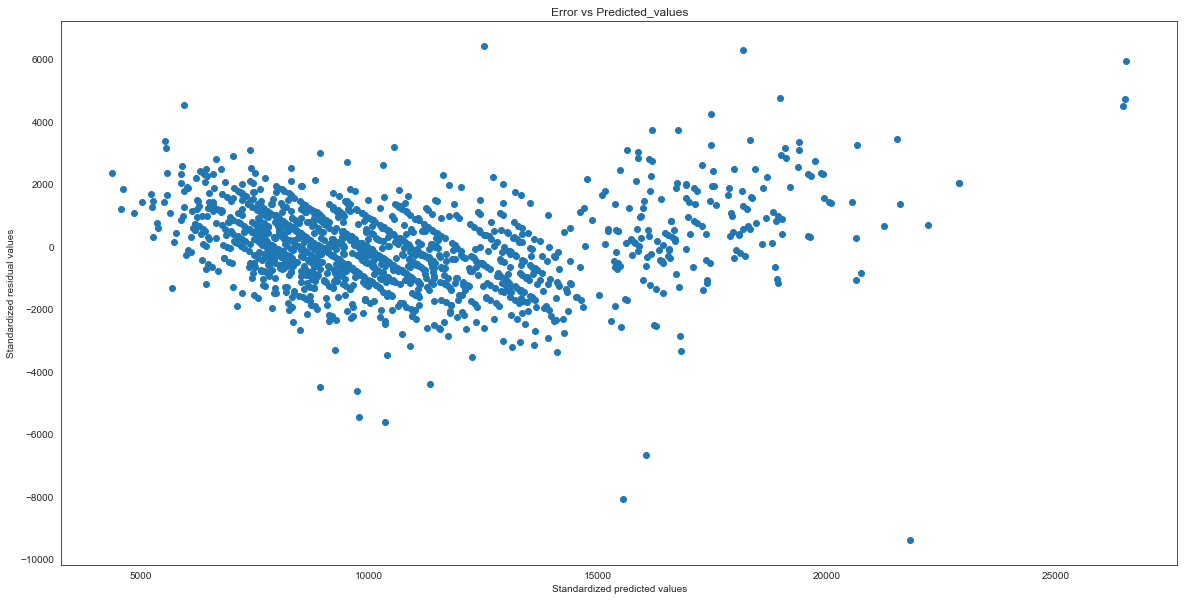

In [71]:
plt.figure(figsize=(20,10))
plt.scatter(get_standardized_value(m_1.fittedvalues),get_standardized_value(m_1.resid))
plt.title('Error vs Predicted_values')
plt.xlabel('Standardized predicted values')
plt.ylabel('Standardized residual values')

eval_env: 1


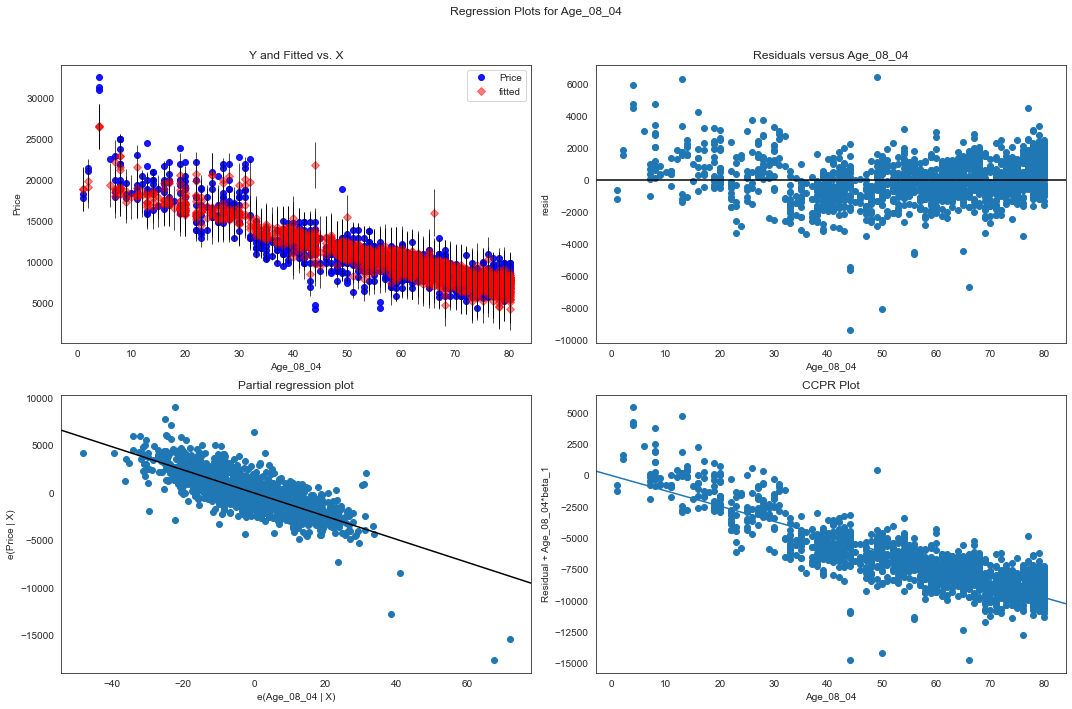

In [73]:
# Plotting the Regression plots for all the features

fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(m_1,'Age_08_04',fig=fig)

eval_env: 1


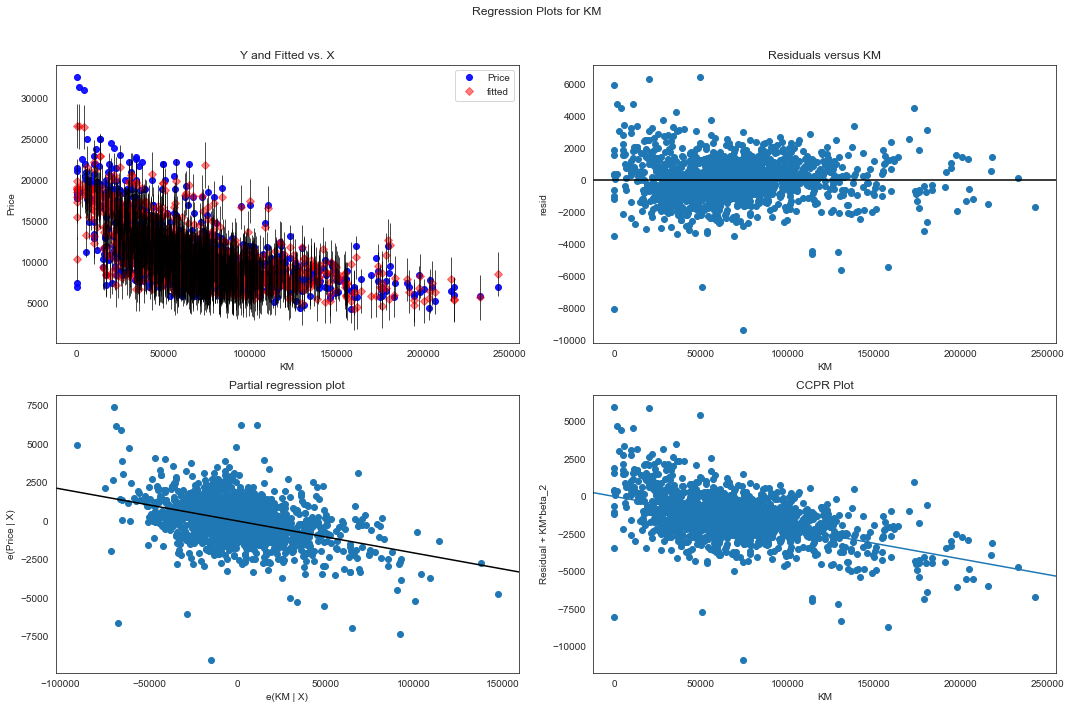

In [74]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(m_1,'KM',fig=fig)

eval_env: 1


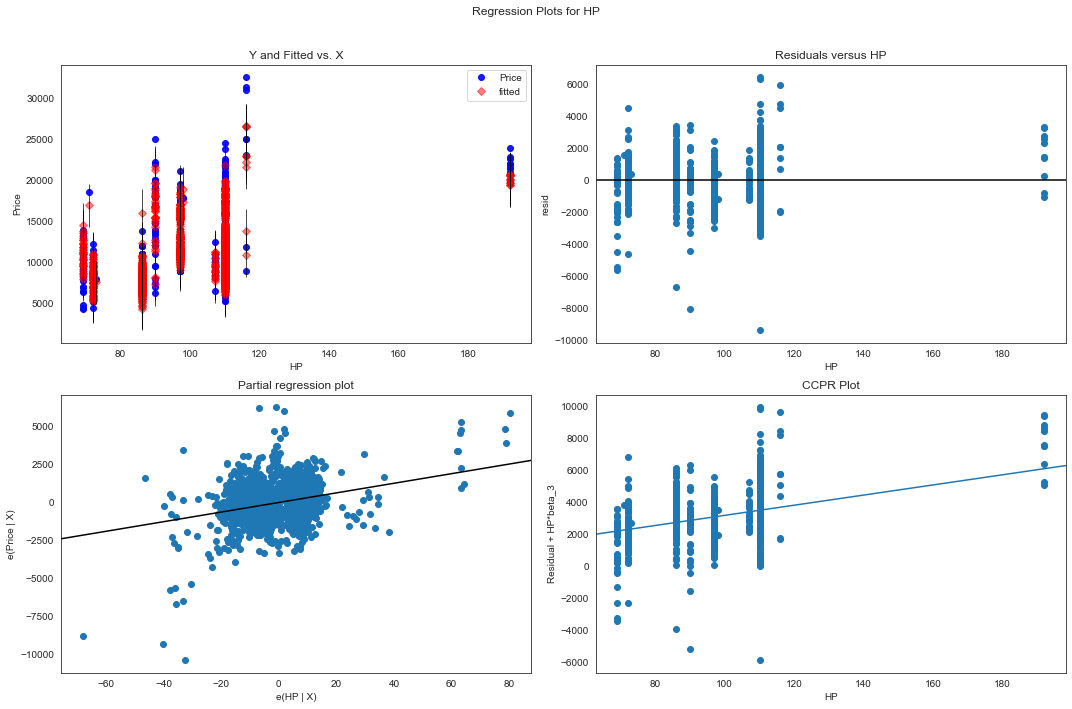

In [75]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(m_1,'HP',fig=fig)

eval_env: 1


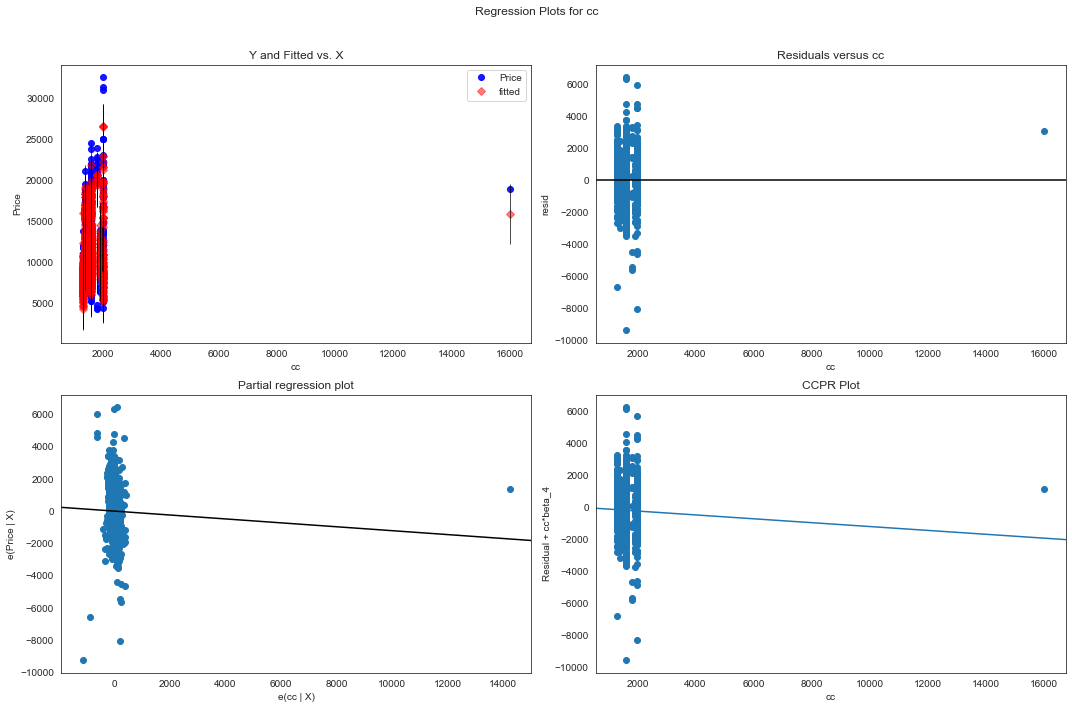

In [76]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(m_1,'cc',fig=fig)

eval_env: 1


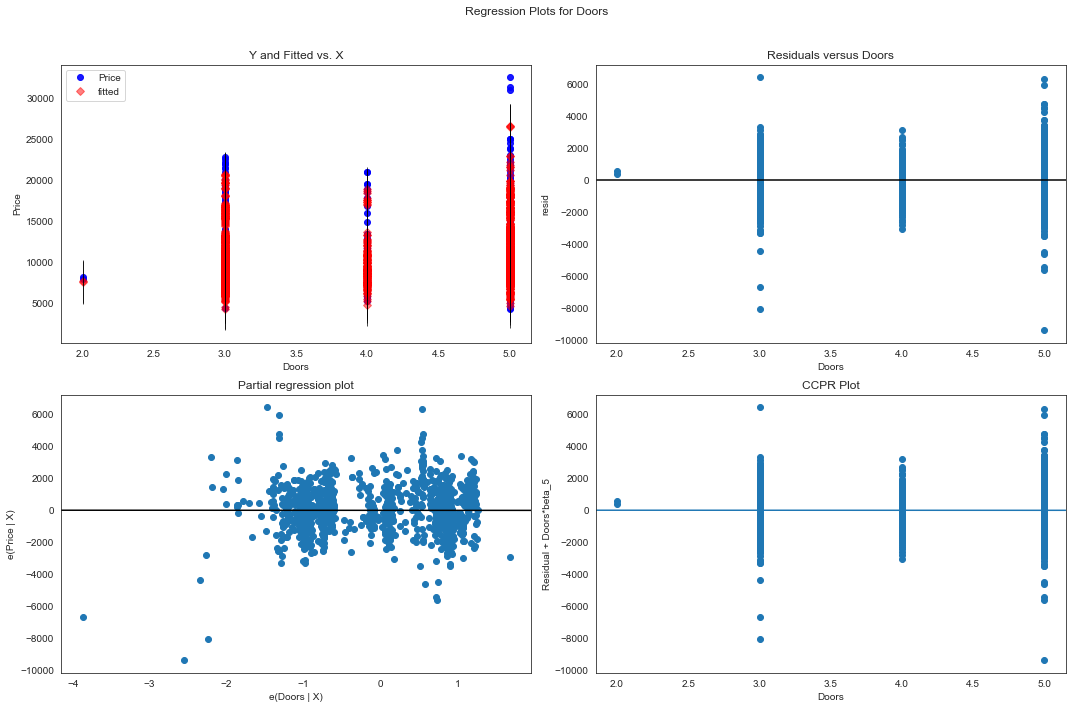

In [77]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(m_1,'Doors',fig=fig)

eval_env: 1


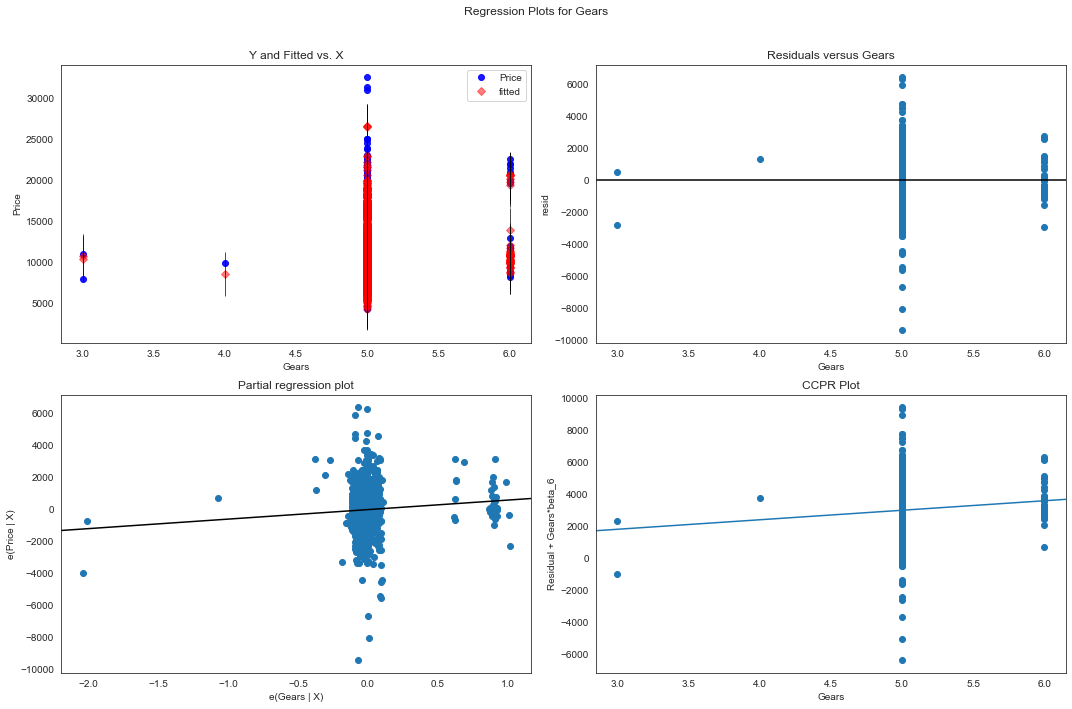

In [78]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(m_1,'Gears',fig=fig)

eval_env: 1


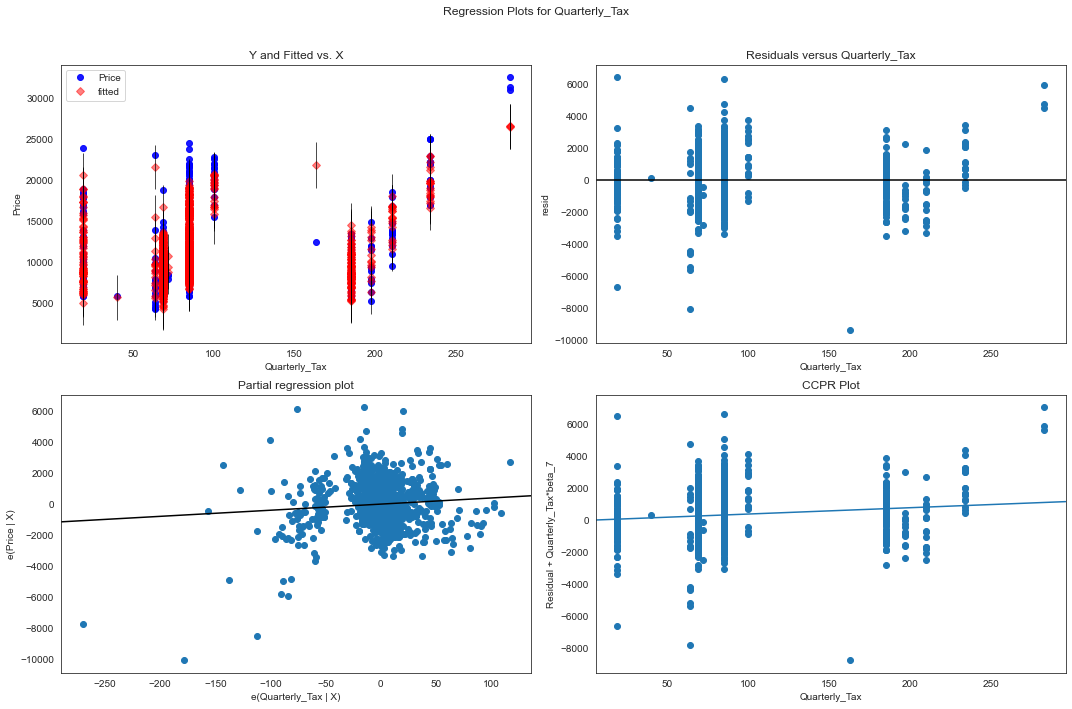

In [79]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(m_1,'Quarterly_Tax',fig=fig)

eval_env: 1


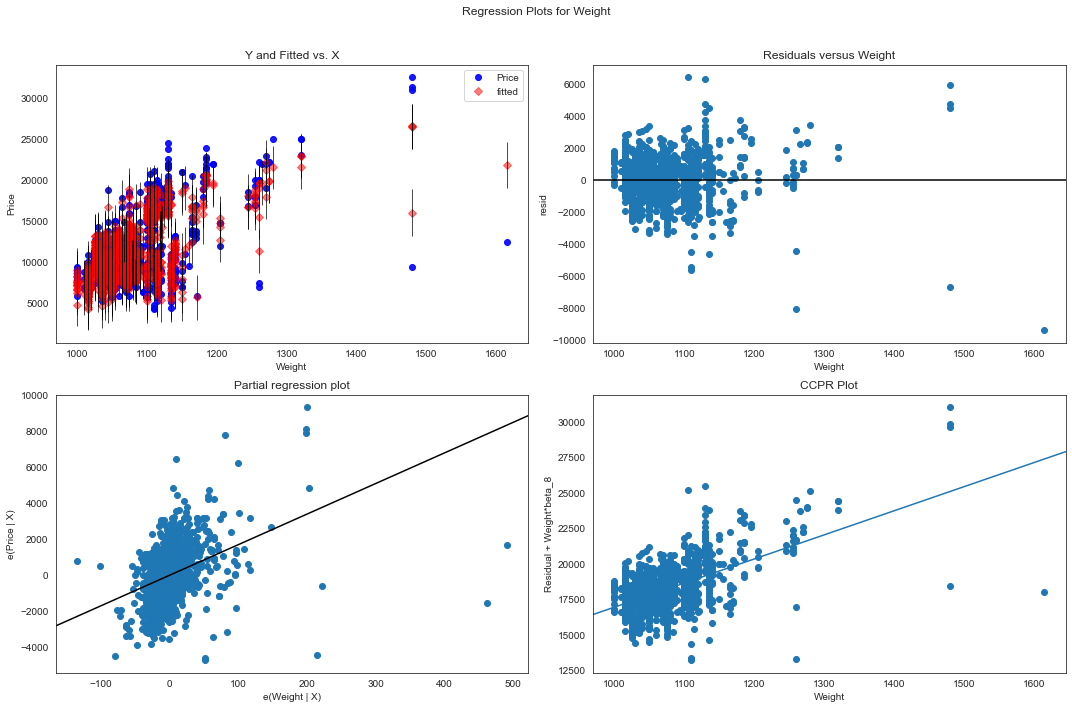

In [80]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(m_1,'Weight',fig=fig)

Detecting Outliers/Influencers and Deleting those particular rows

In [81]:
model_influence=m_1.get_influence()
(c,_)=model_influence.cooks_distance

In [88]:
K=8
N=1436
(3*(K+1))/N

0.018802228412256268

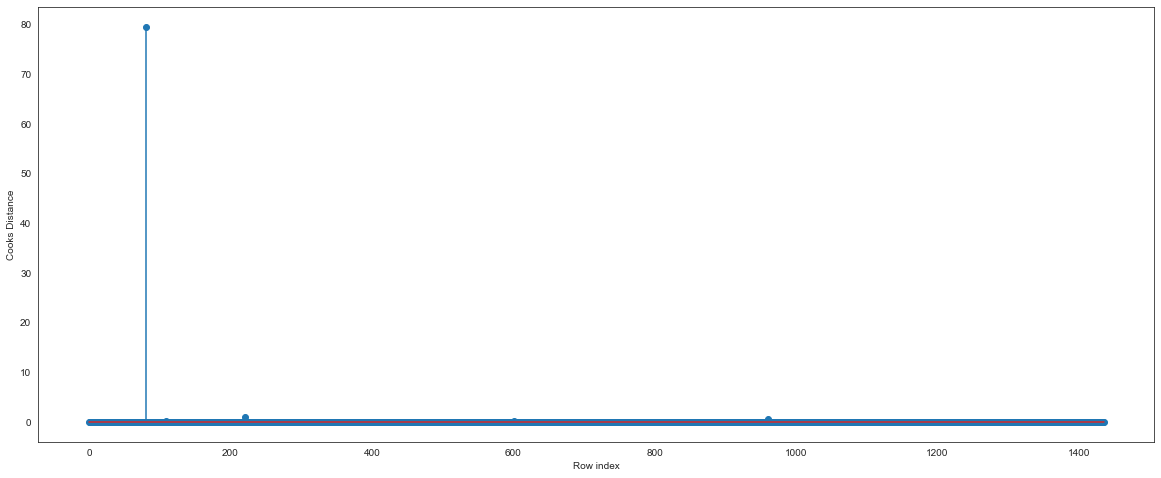

In [83]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [87]:
np.where(c>0.018802)      # This does not make any sense because the threshhold is very low

(array([  14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058], dtype=int64),)

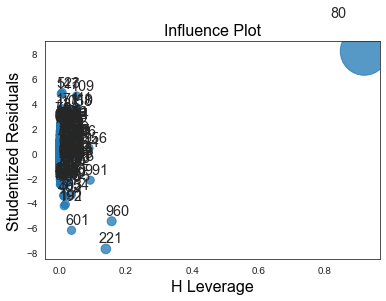

In [90]:
# Using Influence plot
from statsmodels.graphics.api import influence_plot
influence_plot(m_1)
plt.show()

In [91]:
# As we can see, the row 80 is the only outlier
# Dropping the row 80 from the data

In [94]:
df_new=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [96]:
df_new=df_new.drop(df_new.index[[80]],axis=0).reset_index()

In [98]:
df_new=df_new.drop(['index'],axis=1)

In [103]:
df_new.shape

(1435, 38)

In [104]:
# Creating a new Model by removing the feature "Doors"
m_2=smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=df_new).fit()
m_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:37:07   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age_08_04      -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP               39.1593      2.898     13.512      0.000      33.474      44.844
cc               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
m_2.rsquared

0.8693349475698542

In [106]:
m_2.params

Intercept       -6313.939621
Age_08_04        -120.457695
KM                 -0.017894
HP                 39.159255
cc                 -2.506874
Gears             549.731101
Quarterly_Tax       9.075930
Weight             19.962273
dtype: float64

In [108]:
m_2.pvalues

Intercept         5.319061e-06
Age_08_04        2.296010e-292
KM                5.564084e-42
HP                3.086498e-39
cc                5.827586e-16
Gears             3.725373e-03
Quarterly_Tax     2.473062e-10
Weight            5.723957e-69
dtype: float64

# The final model has pvalues less and the r_squared value= 0.8693

# Q2--> 50_startups

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [178]:
data_2=pd.read_csv("50_Startups.csv")
data_2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [179]:
# X--> R&D Spend, Administration, Marketing Spend
# Y--> Profit

In [180]:
# droping the states column because it is not useful
data_2=data_2[['R&D Spend','Administration','Marketing Spend','Profit']]
data_2.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [181]:
data_2=data_2.rename(columns={'R&D Spend':'research'})
data_2=data_2.rename(columns={'Administration':'Admin'})
data_2=data_2.rename(columns={'Marketing Spend':'Marketing'})

In [182]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   research   50 non-null     float64
 1   Admin      50 non-null     float64
 2   Marketing  50 non-null     float64
 3   Profit     50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [183]:
data_2.isna().sum()    # No null values

research     0
Admin        0
Marketing    0
Profit       0
dtype: int64

In [184]:
# Correlation matrix
corr_matrix=data_2.corr()
print(corr_matrix)

           research     Admin  Marketing    Profit
research   1.000000  0.241955   0.724248  0.972900
Admin      0.241955  1.000000  -0.032154  0.200717
Marketing  0.724248 -0.032154   1.000000  0.747766
Profit     0.972900  0.200717   0.747766  1.000000


<AxesSubplot:>

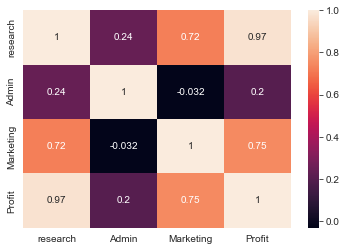

In [185]:
sn.heatmap(corr_matrix,annot=True)    # Marketing spend and R&D Spend are related--> 0.72

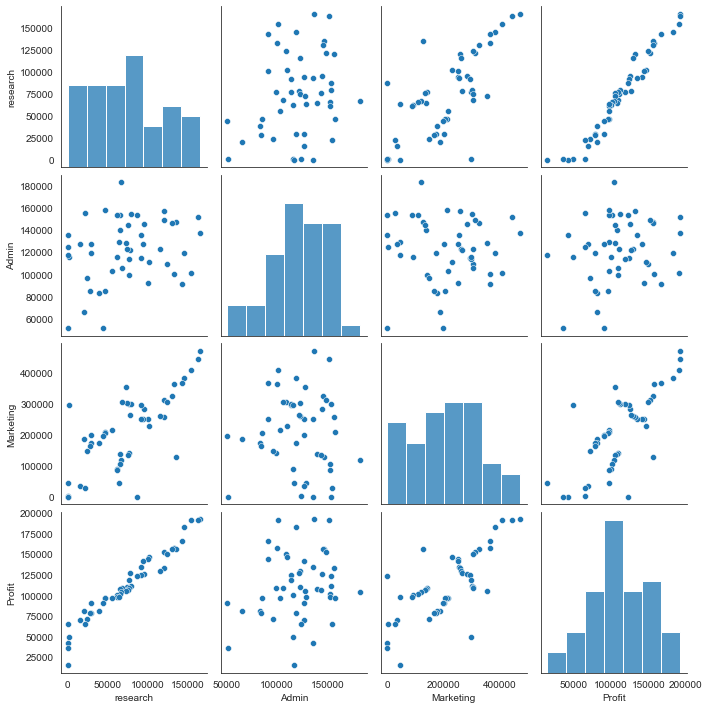

In [186]:
# Pair Plots
sn.pairplot(data_2)

In [187]:
# Building a model
model=smf.ols('Profit~research+Admin+Marketing',data=data_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        14:57:29   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
research       0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p values of Administrative spend and Marketing spend are high which means that they are correlated. The r_squared value is 0.951 which is good.

In [188]:
# Building individual models
m_adm=smf.ols('Profit~Admin',data=data_2).fit()
m_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 02 Jul 2022   Prob (F-statistic):              0.162
Time:                        15:00:55   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
m_mar=smf.ols('Profit~Marketing',data=data_2).fit()
m_mar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           4.38e-10
Time:                        15:10:12   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
# Marketing and Admin combined model
m_adm_mar=smf.ols('Profit~Marketing+Admin',data=data_2).fit()
m_adm_mar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           2.50e-10
Time:                        15:12:19   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Marketing      0.2488      0.030      8.281      0.000       0.188       0.309
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
# Calculating VIF for all the features
rsq_1=smf.ols('research~Admin+Marketing',data=data_2).fit().rsquared
vif_research=1/(1-rsq_1)

rsq_2=smf.ols('Admin~Marketing+research',data=data_2).fit().rsquared
vif_admin=1/(1-rsq_2)

rsq_3=smf.ols('Marketing~Admin+research',data=data_2).fit().rsquared
vif_marketing=1/(1-rsq_3)

vif=pd.DataFrame({'Parameters':['Research','Admin','Marketing'],'VIF':[vif_research,vif_admin,vif_marketing]})
vif

,Parameters,VIF
0,Research,2.468903
1,Admin,1.175091
2,Marketing,2.326773


In [192]:
# All VIF values are less than 20--> the features are independent 
# But from the model p_value we can say that there is some correlation between Marketing spend and Admin Spend

<Figure size 1080x720 with 0 Axes>

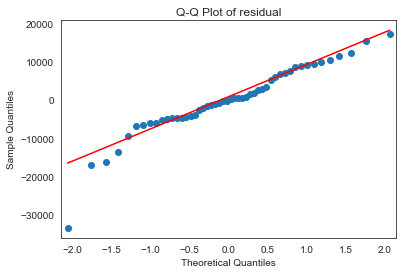

In [197]:
# Test for Normality(Q-Q Plot)

plt.figure(figsize=(15,10))
sm.qqplot(model.resid,line='q')
plt.title("Q-Q Plot of residual")
plt.show()

In [198]:
# Test for homoscedasticity

def get_standardized_vals(vals):
    return(vals-vals.mean()/vals.std())

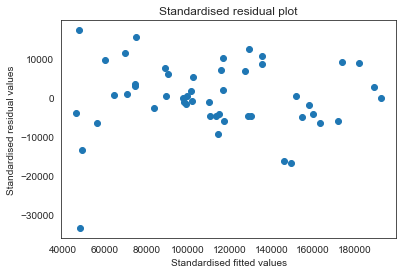

In [199]:
plt.scatter(get_standardized_vals(model.fittedvalues),get_standardized_vals(model.resid))
plt.title('Standardised residual plot')
plt.xlabel('Standardised fitted values')
plt.ylabel('Standardised residual values')
plt.show()

eval_env: 1


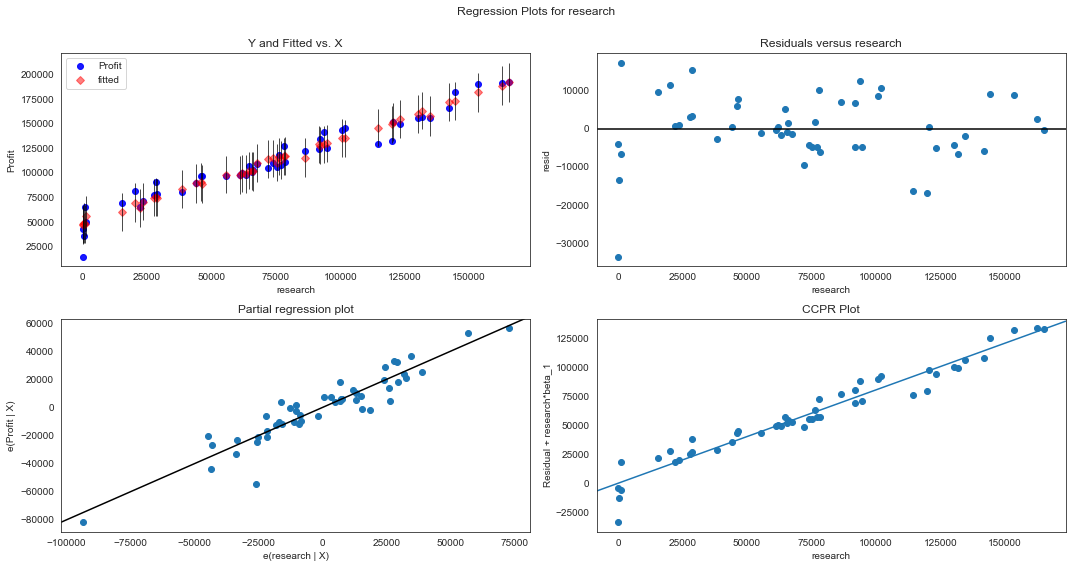

In [200]:
# Regression plots for each feature

fig=plt.figure(figsize=(15,8))
figure=sm.graphics.plot_regress_exog(model,'research',fig=fig)
plt.show()

eval_env: 1


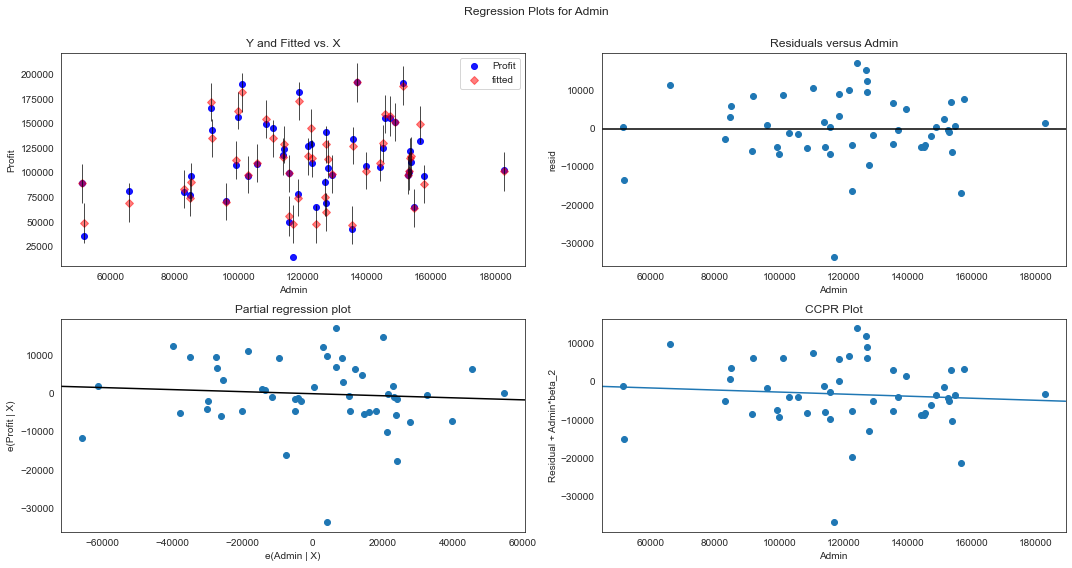

In [202]:
fig=plt.figure(figsize=(15,8))
figure=sm.graphics.plot_regress_exog(model,'Admin',fig=fig)
plt.show()

eval_env: 1


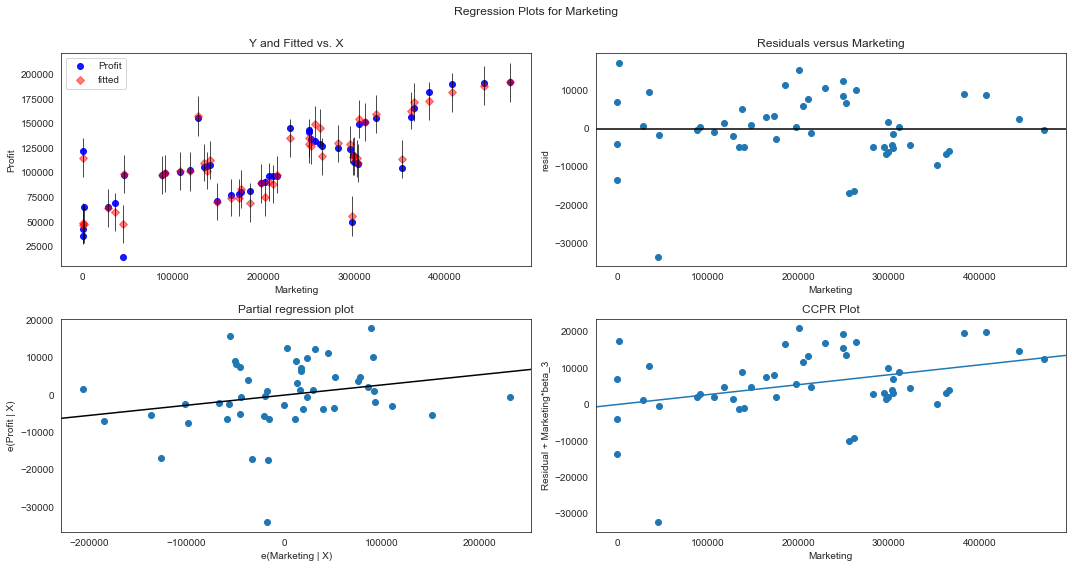

In [203]:
fig=plt.figure(figsize=(15,8))
figure=sm.graphics.plot_regress_exog(model,'Marketing',fig=fig)
plt.show()

In [204]:
# Detecting and deleting outliers from the model

model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [205]:
K=3
N=50
3*(K+1)/N

0.24

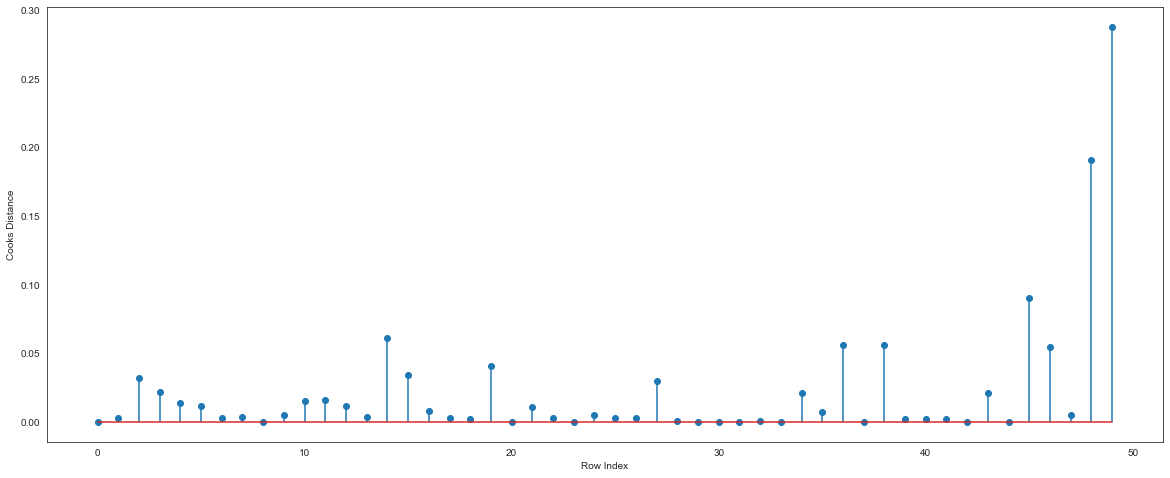

In [206]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(data_2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [207]:
np.where(c>0.24)

(array([49], dtype=int64),)

In [208]:
# The row number 49th is the Outlier/Influencer point

In [216]:
# Deleting the 49th row from the data
data_new=data_2
data_new.head()

,research,Admin,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [217]:
data_new=data_new.drop(data_new.index[[49]],axis=0).reset_index()
data_new=data_new.drop(['index'],axis=1)

In [220]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   research   49 non-null     float64
 1   Admin      49 non-null     float64
 2   Marketing  49 non-null     float64
 3   Profit     49 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [221]:
# Building a final model without taking the Administrative Spend into consideration

model_2=smf.ols('Profit~research+Marketing',data=data_new).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           3.74e-33
Time:                        15:56:22   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
research       0.7754      0.035     22.136      0.000       0.705       0.846
Marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
# After removing the Administrative spend the model is improved. The r_square value is 0.961.

In [223]:
# Still you can improve the model 

In [227]:
model_3=smf.ols('np.log(Profit)~research+Marketing',data=data_new).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     194.8
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           3.49e-23
Time:                        16:04:31   Log-Likelihood:                 34.529
No. Observations:                  49   AIC:                            -63.06
Df Residuals:                      46   BIC:                            -57.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9825      0.038    292.267      0.000      10.907      11.058
research    7.412e-06   5.62e-07     13.186      0.000    6.28e-06    8.54e-06
Marketing    1.96e-07   2.09e-07      0.936      0.354   -2.25e-07    6.17e-07
==============================================================================
Omnibus:                       34.029   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.452
Skew:                          -1.925   Prob(JB):                     1.02e-19
Kurtosis:                       8.292   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [229]:
model_4=smf.ols('np.sqrt(Profit)~research+Marketing',data=data_new).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     391.6
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           1.30e-29
Time:                        16:05:19   Log-Likelihood:                -197.28
No. Observations:                  49   AIC:                             400.6
Df Residuals:                      46   BIC:                             406.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    236.0703      4.261     55.408      0.000     227.494     244.646
research       0.0012   6.37e-05     18.573      0.000       0.001       0.001
Marketing   3.533e-05   2.37e-05      1.489      0.143   -1.24e-05    8.31e-05
==============================================================================
Omnibus:                       12.866   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.806
Skew:                          -0.970   Prob(JB):                     0.000609
Kurtosis:                       4.867   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [230]:
model_5=smf.ols('np.sqrt(Profit)~np.sqrt(research)+np.sqrt(Marketing)',data=data_new).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     345.2
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           2.00e-28
Time:                        16:06:04   Log-Likelihood:                -200.19
No. Observations:                  49   AIC:                             406.4
Df Residuals:                      46   BIC:                             412.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            186.4235      6.273     29.717      0.000     173.796     199.051
np.sqrt(research)      0.5320      0.029     18.282      0.000       0.473       0.591
np.sqrt(Marketing)     0.0239      0.017      1.406      0.166      -0.010       0.058
==============================================================================
Omnibus:                       11.639   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.694
Skew:                           1.023   Prob(JB):                      0.00289
Kurtosis:                       4.242   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [232]:
r_sq=pd.DataFrame({'model_number':['2','3','4','5'],'r_square':[0.961,0.894,0.945,0.938]})
r_sq

,model_number,r_square
0,2,0.961
1,3,0.894
2,4,0.945
3,5,0.938


# The model_2 works best out of all the models, hence the final r_squared value is 0.961